In [1]:
!pip install pymongo

In [2]:
# Imports
import bson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
import string
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [3]:
!pip install scikit-surprise

In [4]:
import bson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.sparse import csr_matrix
from surprise import BaselineOnly, SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split as surprise_train_test_split
from surprise import KNNBasic, KNNWithMeans, NMF
from sklearn.neighbors import KNeighborsRegressor
from surprise.model_selection import GridSearchCV
import time


In [5]:
import nltk
import spacy

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Habiba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
!python -m spacy download fr_core_news_sm

     ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
     -- ------------------------------------- 1.0/16.3 MB 5.6 MB/s eta 0:00:03
     ------ --------------------------------- 2.6/16.3 MB 7.6 MB/s eta 0:00:02
     ----------- ---------------------------- 4.7/16.3 MB 8.4 MB/s eta 0:00:02
     ---------------- ----------------------- 6.8/16.3 MB 8.9 MB/s eta 0:00:02
     ---------------------- ----------------- 9.2/16.3 MB 9.4 MB/s eta 0:00:01
     ---------------------------- ----------- 11.5/16.3 MB 9.8 MB/s eta 0:00:01
     ---------------------------------- ----- 13.9/16.3 MB 9.9 MB/s eta 0:00:01
     ---------------------------------------  16.3/16.3 MB 9.9 MB/s eta 0:00:01
     ---------------------------------------- 16.3/16.3 MB 9.7 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [9]:
# Open and read the BSON files
with open("./trictrac/details.bson", "rb") as f:
    details = bson.decode_all(f.read())


with open("./trictrac/infos_scrapping.bson", "rb") as f:
    infos = bson.decode_all(f.read())

with open("./trictrac/jeux.bson", "rb") as f:
    jeux = bson.decode_all(f.read())


with open("./trictrac/avis.bson", "rb") as f:
    avis = bson.decode_all(f.read())

In [202]:
len_details=len(details)
len_jeux=len(jeux)
len_infos=len(infos)
len_avis=len(avis)
print(f"Longeur de chaque table de donn√©es avis: {len_avis}, jeux: {len_jeux}, infos: {len_infos}, details : {len_details}")


Longeur de chaque table de donn√©es avis: 246524, jeux: 20235, infos: 532, details : 20234


In [235]:
pdDetails = pd.DataFrame(details)
pdJeux = pd.DataFrame(jeux)
pdInfos = pd.DataFrame(infos)
pdAvis = pd.DataFrame(avis)

In [236]:
pdAvis = pd.DataFrame(avis)
print("\nAvis:\n", pdAvis.describe())


Avis:
                note
count  246524.00000
mean        7.59307
std         2.12589
min         0.00000
25%         6.00000
50%         8.00000
75%         9.40000
max        10.00000


In [237]:
pdAvis.head()

_id              author       date_published  \
0  63c6726ea81f3e3016af9a56  Monsieur Guillaume  2021-01-27 11:06:44   
1  63c6726ea81f3e3016af9a57          morlockbob  2020-10-18 10:04:21   
2  63c6726ea81f3e3016af9a58              SwatSh  2021-02-01 08:35:08   
3  63c6726ea81f3e3016af9a59     Timi JeuxATheme  2020-11-19 17:04:57   
4  63c6726ea81f3e3016af9a5a           prunelles  2021-05-24 12:43:18   

                          title_review  note  \
0  Voyages sur les ailes des papillons   8.0   
1             le festival de Michoacan   7.0   
2     Vivez la migration des monarques   7.0   
3                                  Bon   8.0   
4                          Envolez-moi   9.0   

                                         review_href      title  \
0   https://www.trictrac.net/avis/vraiment-bon-12514  Mariposas   
1  https://www.trictrac.net/avis/le-festival-de-m...  Mariposas   
2  https://www.trictrac.net/avis/vivez-la-migrati...  Mariposas   
3                                               None  Mariposas   
4          https://www.trictrac.net/avis/envolez-moi  Mariposas   

                                                 url  treated  \
0  https://www.trictrac.net/jeu-de-societe/maripo...     True   
1  https://www.trictrac.net/jeu-de-societe/maripo...     True   
2  https://www.trictrac.net/jeu-de-societe/maripo...     True   
3  https://www.trictrac.net/jeu-de-societe/maripo...     True   
4  https://www.trictrac.net/jeu-de-societe/maripo...     True   

                                             comment  
0  Lorsque le jeu est jeu, bon, r√©flexif, joli po...  
1  Comment continuer apr√®s un mega hit¬†? Simpleme...  
2  Vin d'jeu: Avec Mariposas, Elizabeth Hargrave ...  
3                                                NaN  
4  Tr√®s joli bijou que ce jeu-l√† ! Le mat√©riel, l...

In [238]:
print(pdAvis.loc[0, "comment"])  # Affiche le premier commentaire

Lorsque le jeu est jeu, bon, r√©flexif, joli pour qui est sensible √† ce style d'illustration... Lorsque l'on a envie d'y rejouer encore pour essayer autrement, et revivre cette histoire de papillons et de voyages... Et lorsqu'en plus, au d√©tour des r√®gles, on s'int√©resse √©galement au propos et √† la sensibilisation, l√©g√®re comme les ailes du dit-papillons et pourtant aussi bien amen√©, alors effectivement, il y a l√† un tr√®s bon jeu, ludiquement parlant (et il est possible de s'arr√™ter l√†) mais √©galement tr√®s bon pour l'ouverture des yeux des joueuses et joueurs au monde qui nous entoure... √áa, c'est deux fois bon !


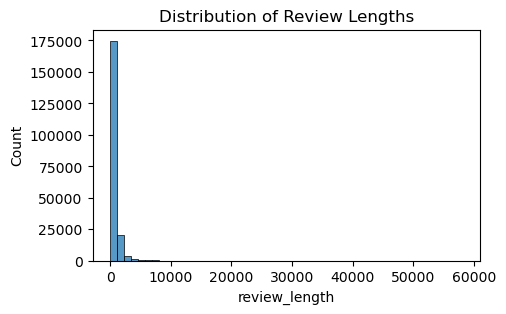

Average review length: 619 characters


In [239]:
pdAvis['review_length'] = pdAvis['comment'].str.len()

plt.figure(figsize=(5, 3))
sns.histplot(data=pdAvis, x='review_length',bins=50)
plt.title('Distribution of Review Lengths')
plt.show()

print(f"Average review length: {pdAvis['review_length'].mean():.0f} characters")

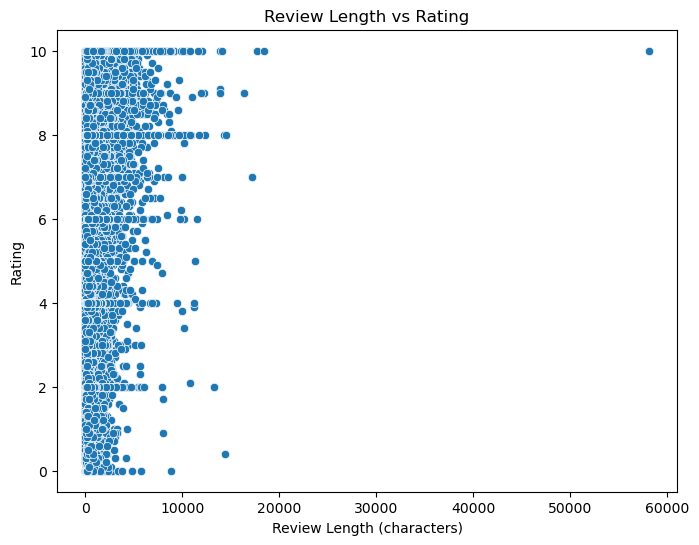

In [240]:
# Analyze if review length correlates with rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pdAvis, x='review_length', y='note')
plt.title('Review Length vs Rating')
plt.xlabel('Review Length (characters)')
plt.ylabel('Rating')
plt.show()

In [241]:
#2 reviews with around 60000 words that arent interesting to keep (they are spam)
pdAvis[pdAvis["review_length"] >50000]

_id               author       date_published  \
22193  63c67506993b727dc2a7a3a6  The Lonesome Meeple  2020-04-16 18:24:56   
79884  63c6776e993b727dc2a88501  The Lonesome Meeple  2020-04-16 18:24:56   

                                            title_review  note  \
22193  Histoire de Meeples #1 Sub Terra [Partie narra...  10.0   
79884  Histoire de Meeples #1 Sub Terra [Partie narra...  10.0   

                                             review_href      title  \
22193  https://www.trictrac.net/avis/sub-terra-partie...  Sub Terra   
79884  https://www.trictrac.net/avis/sub-terra-partie...  Sub Terra   

                                                     url  treated  \
22193  https://www.trictrac.net/jeu-de-societe/sub-te...     True   
79884  https://www.trictrac.net/jeu-de-societe/sub-te...     True   

                                                 comment  review_length  
22193  R√©cit √† retrouver sur mon blog Histoires de Me...        58097.0  
79884  R√©cit √† retrouver sur mon blog Histoires de Me...        58097.0

In [242]:
pdAvis[pdAvis["author"]== "The Lonesome Meeple"]

_id               author       date_published  \
21474  63c67500993b727dc2a7a0d7  The Lonesome Meeple  2020-04-21 22:32:46   
22193  63c67506993b727dc2a7a3a6  The Lonesome Meeple  2020-04-16 18:24:56   
79884  63c6776e993b727dc2a88501  The Lonesome Meeple  2020-04-16 18:24:56   
84272  63c67799993b727dc2a89625  The Lonesome Meeple  2020-04-21 22:32:46   

                                            title_review  note  \
21474  Histoire de Meeples #4 SOS Dino |Partie Narrat...  10.0   
22193  Histoire de Meeples #1 Sub Terra [Partie narra...  10.0   
79884  Histoire de Meeples #1 Sub Terra [Partie narra...  10.0   
84272  Histoire de Meeples #4 SOS Dino |Partie Narrat...  10.0   

                                             review_href      title  \
21474  https://www.trictrac.net/avis/histoire-de-meep...   SOS DINO   
22193  https://www.trictrac.net/avis/sub-terra-partie...  Sub Terra   
79884  https://www.trictrac.net/avis/sub-terra-partie...  Sub Terra   
84272  https://www.trictrac.net/avis/histoire-de-meep...   SOS DINO   

                                                     url  treated  \
21474  https://www.trictrac.net/jeu-de-societe/sos-di...     True   
22193  https://www.trictrac.net/jeu-de-societe/sub-te...     True   
79884  https://www.trictrac.net/jeu-de-societe/sub-te...     True   
84272  https://www.trictrac.net/jeu-de-societe/sos-di...     True   

                                                 comment  review_length  
21474  R√©cit √† retrouver avec photos sur mon blog His...        12044.0  
22193  R√©cit √† retrouver sur mon blog Histoires de Me...        58097.0  
79884  R√©cit √† retrouver sur mon blog Histoires de Me...        58097.0  
84272  R√©cit √† retrouver avec photos sur mon blog His...        12044.0

In [243]:
print(f"Dimensions de pdAvis avant nettoyage : {pdAvis.shape}")

Dimensions de pdAvis avant nettoyage : (246524, 11)


In [244]:
pdAvis=pdAvis[pdAvis["review_length"] != 58097.0]
print(f"Dimensions de pdAvis apr√®s nettoyage : {pdAvis.shape}")

Dimensions de pdAvis apr√®s nettoyage : (246522, 11)


In [245]:
#enlever les doublons
pdAvis = pdAvis.copy()
print(f"Dimensions de pdAvis avant nettoyage : {pdAvis.shape}")
pdAvis.drop_duplicates(subset=['author', 'date_published', 'title_review', 'note', 'review_href', 'title', 'url', 'treated', 'comment' , 'review_length'], inplace=True)
print(f"Dimensions de pdAvis apr√®s nettoyage : {pdAvis.shape}")

Dimensions de pdAvis avant nettoyage : (246522, 11)
Dimensions de pdAvis apr√®s nettoyage : (176242, 11)


In [246]:
# Supprimer les lignes o√π 'comment' est NaN ou vide
pdAvis.dropna(subset=['comment'], inplace=True)
print(f"Dimensions de pdAvis apr√®s nettoyage : {pdAvis.shape}")

Dimensions de pdAvis apr√®s nettoyage : (150723, 11)


In [247]:
# Optionnel : enlever aussi les commentaires vides (juste espaces)
pdAvis = pdAvis[pdAvis['comment'].str.strip() != ""]
print(f"Dimensions de pdAvis apr√®s nettoyage : {pdAvis.shape}")

Dimensions de pdAvis apr√®s nettoyage : (142845, 11)


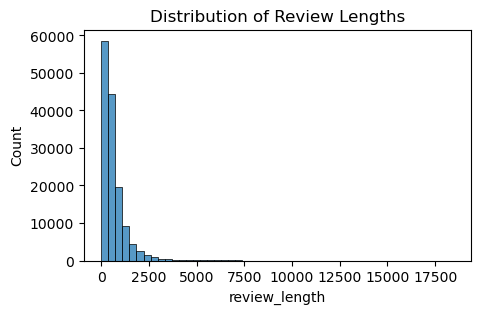

Average review length: 640 characters


In [248]:
#We redid the statistcs about the review length to verify, all is good,the highest review is real
plt.figure(figsize=(5, 3))
sns.histplot(data=pdAvis, x='review_length',bins=50)
plt.title('Distribution of Review Lengths')
plt.show()

print(f"Average review length: {pdAvis['review_length'].mean():.0f} characters")

In [249]:
comment_counts = pdAvis["title"].value_counts()
print(comment_counts)


title
Shogun                                 166
Carcassonne - Die J√§ger und Sammler    150
Jeu de Cochons                         148
Dune                                   148
La Citt√†                               148
                                      ... 
Warhammer patrouilles                    1
Praetoria Prima                          1
Thalie                                   1
Jason                                    1
Liar's dice                              1
Name: count, Length: 10341, dtype: int64


In [250]:
# Filtrer les jeux avec au moins 2 commentaires --> Difficile √† recommander intelligemment (trop peu d‚Äôinfos)
print(f"Dimensions de pdAvis avant nettoyage : {pdAvis.shape}")
game_counts = pdAvis['title'].value_counts()
valid_games = game_counts[game_counts >= 2].index
pdAvis = pdAvis[pdAvis['title'].isin(valid_games)]
print(f"Dimensions de pdAvis apr√®s nettoyage : {pdAvis.shape}")

Dimensions de pdAvis avant nettoyage : (142845, 11)
Dimensions de pdAvis apr√®s nettoyage : (140157, 11)


In [251]:
lis = pdAvis["author"].value_counts()
print(len(lis[lis == 3]))

862


In [28]:
# Filtrer les utilisateurs avec au moins 3 commentaires --> On ne peut pas calculer sa similarit√© avec d'autres utilisateurs
#on veut que le knn soient trouve des voisins reellement similaires
#print(f"Dimensions de pdAvis avant nettoyage : {pdAvis.shape}")
#user_counts = pdAvis['author'].value_counts()
#valid_users = user_counts[user_counts >= 2].index
#pdAvis = pdAvis[pdAvis['author'].isin(valid_users)]
#print(f"Dimensions de pdAvis apr√®s nettoyage : {pdAvis.shape}")

Dimensions de pdAvis avant nettoyage : (140157, 11)
Dimensions de pdAvis apr√®s nettoyage : (135605, 11)


In [29]:
def preprocess(text):
    """
    Transforms text to remove unwanted bits.
    """
    punc = string.punctuation
    punc += '\n\r\t'
    text=text.lower()
    text = text.translate(str.maketrans(punc, ' ' * len(punc)))
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\b[a-zA-Z]\b', '', text)  # Supprimer les mots d'une seule lettre
    text = re.sub(r'\b([a-zA-Z])\1{1,}\b', '', text) # Supprimer les mots contenant la m√™me lettre r√©p√©t√©e
    return text

In [30]:
import pandas as pd
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Charger les stopwords fran√ßais + le mot jeu
stop_words = set(stopwords.words("french"))


# Fonction de nettoyage des commentaires
def nettoyer_texte(texte):
    if isinstance(texte, str):  # V√©rifier si le texte n'est pas NaN
        texte = texte.lower()  # Convertir en minuscules
        texte = re.sub(r'\W', ' ', texte)  # Supprimer la ponctuation
        texte = re.sub(r'\s+', ' ', texte).strip()  # Supprimer les espaces inutiles
        texte = re.sub(r'\d+', '', texte)
        tokens = texte.split()  # Tokenisation simple
        tokens = [t for t in tokens if t not in stop_words]  # Supprimer les stopwords
        return " ".join(tokens)
    return ""

pdAvis["comment_clean"] = pdAvis["comment"].apply(nettoyer_texte)

print(pdAvis[["comment", "comment_clean"]].head())


                                             comment  \
0  Lorsque le jeu est jeu, bon, r√©flexif, joli po...   
1  Comment continuer apr√®s un mega hit¬†? Simpleme...   
2  Vin d'jeu: Avec Mariposas, Elizabeth Hargrave ...   
4  Tr√®s joli bijou que ce jeu-l√† ! Le mat√©riel, l...   
5  Mariposas est plut√¥t beau avec un grand platea...   

                                       comment_clean  
0  lorsque jeu jeu bon r√©flexif joli sensible sty...  
1  comment continuer apr√®s mega hit simplement ap...  
2  vin jeu mariposas elizabeth hargrave parvient ...  
4  tr√®s joli bijou jeu l√† mat√©riel illustrations ...  
5  mariposas plut√¥t beau grand plateau petits pap...  


In [31]:
nlp = spacy.load('fr_core_news_sm')
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop

def filtrer_commentaire(commentaire):
    doc = nlp(commentaire) #tokenization
    pos_exclues = ['DET', 'CONJ', 'PRON', 'ADP', 'CCONJ', 'PUNCT', 'VERB'] #enlever toutes ces choses (+ verbes)
    mots_filtres = [token.lemma_ for token in doc if token.pos_ not in pos_exclues and token.lemma_ not in fr_stop]
    return ' '.join(mots_filtres)

In [32]:
pdAvis['comment_clean'] = pdAvis['comment'].apply(filtrer_commentaire)

KeyboardInterrupt: 

In [33]:
print(pdAvis[["comment", "comment_clean"]].head())

                                             comment  \
0  Lorsque le jeu est jeu, bon, r√©flexif, joli po...   
1  Comment continuer apr√®s un mega hit¬†? Simpleme...   
2  Vin d'jeu: Avec Mariposas, Elizabeth Hargrave ...   
4  Tr√®s joli bijou que ce jeu-l√† ! Le mat√©riel, l...   
5  Mariposas est plut√¥t beau avec un grand platea...   

                                       comment_clean  
0  lorsque jeu jeu bon r√©flexif joli sensible sty...  
1  comment continuer apr√®s mega hit simplement ap...  
2  vin jeu mariposas elizabeth hargrave parvient ...  
4  tr√®s joli bijou jeu l√† mat√©riel illustrations ...  
5  mariposas plut√¥t beau grand plateau petits pap...  


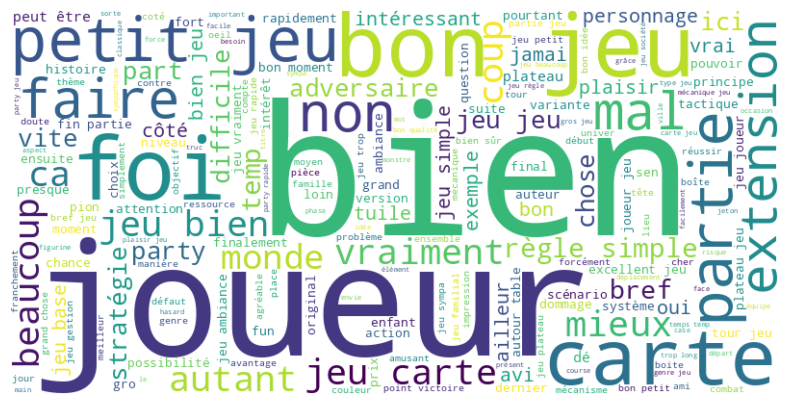

In [31]:
# Concat√©ner tous les commentaires nettoy√©s
text = " ".join(pdAvis["comment_clean"])

# G√©n√©rer le wordcloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Afficher le wordcloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


**meme chose que dans l'autre fichier de la partie 1**

In [36]:
# Imports
import bson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from scipy.sparse import csr_matrix



###################################################################################################



def minipingpong(sparse_matrix, allusers, allgames, min_ratings_users, min_ratings_games, max_iterations=10, plot=True):
    matrix = sparse_matrix.tocoo()
    users = np.array(allusers)
    games = np.array(allgames)
    iteration = 0
    while iteration < max_iterations:
        game_ratings = np.bincount(matrix.col, minlength=len(games))
        user_ratings = np.bincount(matrix.row, minlength=len(users))

        valid_games = np.where(game_ratings >= min_ratings_games)[0]

        valid_users = np.where(user_ratings >= min_ratings_users)[0]

        keep = np.isin(matrix.row, valid_users) & np.isin(matrix.col, valid_games)

        new_row = matrix.row[keep]
        new_col = matrix.col[keep]
        new_data = matrix.data[keep]

        # Update row and column indices to match new dimensions
        row_mapping = {old: new for new, old in enumerate(valid_users)}
        col_mapping = {old: new for new, old in enumerate(valid_games)}

        new_row = np.array([row_mapping[r] for r in new_row])
        new_col = np.array([col_mapping[c] for c in new_col])

        # Create the new matrix
        matrix = csr_matrix((new_data, (new_row, new_col)),
                           shape=(len(valid_users), len(valid_games)))
        # Convert back to COO for next iteration
        matrix = matrix.tocoo()

        # Update user and game lists
        users = users[valid_users]
        games = games[valid_games]
        iteration += 1

    final_matrix = matrix.tocsr()

    return final_matrix

###################################################################################################


def subtract_mean(cleaned_matrix):
    data_array = cleaned_matrix.toarray()

    user_means = []
    for i in range(data_array.shape[0]):
        user_ratings = data_array[i, :]
        non_zero_indices = user_ratings != 0
        user_ratings_non_zero = user_ratings[non_zero_indices]

        if len(user_ratings_non_zero) > 0:
            user_means.append(user_ratings_non_zero.mean())
        else:
            user_means.append(0)

    # Create a new matrix with normalized ratings
    normalized_data = []
    normalized_rows = []
    normalized_cols = []

    cleaned_matrix_coo = cleaned_matrix.tocoo()
    # For each non-zero entry in the original matrix, subtract user mean
    for i, j, v in zip(cleaned_matrix_coo.row, cleaned_matrix_coo.col, cleaned_matrix_coo.data):
        normalized_value = v - user_means[i]
        normalized_data.append(normalized_value)
        normalized_rows.append(i)
        normalized_cols.append(j)

    # Create new sparse matrix with normalized values
    normalized_matrix = csr_matrix(
        (normalized_data, (normalized_rows, normalized_cols)),
        shape=cleaned_matrix.shape
    )
    return normalized_matrix


###################################################################################################

def custom_train_test_split(sparse_matrix, test_size=0.2, max_user_loss=0.5, max_game_loss=0.5):

    np.random.seed(42)

    coo_matrix = sparse_matrix.tocoo()

    # Total number of ratings
    n_ratings = coo_matrix.data.size
    n_users = sparse_matrix.shape[0]
    n_games = sparse_matrix.shape[1]

    # Count ratings per user and per game
    user_ratings = np.bincount(coo_matrix.row, minlength=n_users)
    game_ratings = np.bincount(coo_matrix.col, minlength=n_games)

    # Calculate maximum allowed test ratings per user and game
    max_test_per_user = np.floor(user_ratings * max_user_loss).astype(int)
    max_test_per_game = np.floor(game_ratings * max_game_loss).astype(int)

    # Initialize counters for test ratings per user and game
    test_per_user = np.zeros(n_users, dtype=int)
    test_per_game = np.zeros(n_games, dtype=int)

    # Create a random permutation of rating indices
    rating_indices = np.random.permutation(n_ratings)

    # Initialize train and test masks
    train_mask = np.ones(n_ratings, dtype=bool)
    test_mask = np.zeros(n_ratings, dtype=bool)

    # Target number of test ratings
    n_test_target = int(test_size * n_ratings)
    n_test_selected = 0

    # Iterate through ratings in random order
    for idx in rating_indices:
        user = coo_matrix.row[idx]
        game = coo_matrix.col[idx]

        # Check if we can add this rating to test set without violating constraints
        if (test_per_user[user] < max_test_per_user[user] and
            test_per_game[game] < max_test_per_game[game] and
            n_test_selected < n_test_target):

            # Add to test set
            train_mask[idx] = False
            test_mask[idx] = True

            # Update counters
            test_per_user[user] += 1
            test_per_game[game] += 1
            n_test_selected += 1

    # Create train and test matrices
    train_matrix = csr_matrix(
        (coo_matrix.data[train_mask],
         (coo_matrix.row[train_mask], coo_matrix.col[train_mask])),
        shape=sparse_matrix.shape
    )

    test_matrix = csr_matrix(
        (coo_matrix.data[test_mask],
         (coo_matrix.row[test_mask], coo_matrix.col[test_mask])),
        shape=sparse_matrix.shape
    )

    # Print statistics
    print(f"Split complete: {n_test_selected} ratings ({n_test_selected/n_ratings:.2%}) in test set")
    print(f"Train set: {train_matrix.nnz} ratings, Test set: {test_matrix.nnz} ratings")

    # Check if any users or games lost too many ratings
    users_with_ratings = np.where(user_ratings > 0)[0]
    games_with_ratings = np.where(game_ratings > 0)[0]

    max_user_loss_actual = np.max(test_per_user[users_with_ratings] / user_ratings[users_with_ratings])
    max_game_loss_actual = np.max(test_per_game[games_with_ratings] / game_ratings[games_with_ratings])

    print(f"Maximum user ratings loss: {max_user_loss_actual:.2%}")
    print(f"Maximum game ratings loss: {max_game_loss_actual:.2%}")

    return train_matrix, test_matrix, train_mask, test_mask

##################################################################################################################################################################

#Baseline models


# Model 1: Global Mean Baseline
def global_mean_baseline(train_matrix,test_matrix):
    """Simplest baseline: predict global mean rating for all users and items"""
    global_mean = train_matrix.data.mean()
    test_rows, test_cols = test_matrix.nonzero()

    # For evaluating on test data
    predictions = np.full_like(test_matrix.data, global_mean)

    rmse = np.sqrt(mean_squared_error(predictions, test_matrix.data))
    mae = mean_absolute_error(predictions, test_matrix.data)
    r2 = r2_score(predictions, test_matrix.data)

    print(f"Global Mean Baseline: RMSE = {rmse:.4f}, MAE = {mae:.4f}")
    return global_mean, rmse, mae , r2


# Model 2: User Mean Baseline
def user_mean_baseline(train_matrix, test_matrix):
    # Get user means from training data
    n_users = train_matrix.shape[0]
    test_rows, test_cols = test_matrix.nonzero()

    # Calculate mean rating for each user (row)
    user_means = np.zeros(n_users)
    for u in range(n_users):
        row = train_matrix.getrow(u)
        if row.nnz > 0:  # If user has any ratings
            user_means[u] = row.data.mean()

    # Make sure test_rows values are within bounds
    valid_indices = [i for i, row in enumerate(test_rows) if row < n_users]

    if len(valid_indices) < len(test_rows):
        print(f"Warning: {len(test_rows) - len(valid_indices)} test entries had out-of-bounds user indices")

    # Use only valid indices
    test_rows_valid = test_rows[valid_indices]
    test_cols_valid = test_cols[valid_indices]
    test_data_valid = test_matrix.data[valid_indices]

    # Make predictions for test data
    predictions = np.array([user_means[row] for row in test_rows_valid])

    # Ensure predictions and test data have same length
    assert len(predictions) == len(test_data_valid), "Predictions and test data must have same length"

    rmse = np.sqrt(mean_squared_error(predictions, test_data_valid))
    mae = mean_absolute_error(predictions, test_data_valid)
    r2 = r2_score(predictions,test_data_valid )

    print(f"User Mean Baseline: RMSE = {rmse:.4f}, MAE = {mae:.4f}")
    return user_means, rmse, mae, r2

# Model 3: Game Mean Baseline
def item_mean_baseline(train_matrix, test_matrix):
    # Calculate mean rating for each item/game (column)
    n_items = train_matrix.shape[1]
    item_means = np.zeros(n_items)
    test_rows, test_cols = test_matrix.nonzero()

    # Get mean of each column (item), accounting for sparsity
    for i in range(n_items):
        col = train_matrix.getcol(i)
        if col.nnz > 0:  # If item has any ratings
            item_means[i] = col.data.mean()

    # Make sure test_cols values are within bounds
    valid_indices = [i for i, col in enumerate(test_cols) if col < n_items]

    if len(valid_indices) < len(test_cols):
        print(f"Warning: {len(test_cols) - len(valid_indices)} test entries had out-of-bounds item indices")

    # Use only valid indices
    test_rows_valid = test_rows[valid_indices]
    test_cols_valid = test_cols[valid_indices]
    test_data_valid = test_matrix.data[valid_indices]

    # Make predictions for test data
    predictions = np.array([item_means[col] for col in test_cols_valid])

    # Ensure predictions and test data have same length
    assert len(predictions) == len(test_data_valid), "Predictions and test data must have same length"

    rmse = np.sqrt(mean_squared_error(predictions, test_data_valid))
    mae = mean_absolute_error(predictions, test_data_valid)
    r2 = r2_score(predictions, test_data_valid)

    print(f"Item Mean Baseline: RMSE = {rmse:.4f}, MAE = {mae:.4f}")
    return item_means, rmse, mae, r2

In [37]:
pdAvis['review_length'] = pdAvis['comment'].str.len()
pdAvis=pdAvis[pdAvis["review_length"] != 58097.0]

#Duplicates removable
pdAvis.drop_duplicates(subset=['author','title_review','note','title','comment'], inplace=True)
pdJeux.drop_duplicates(subset=['title',	'href','avis'], inplace=True)


allgames = sorted(pdJeux["title"].unique())
allusers = sorted(pdAvis['author'].unique())


# Cr√©ation de la dataFrame
ratings_matrix = pd.DataFrame(
    index=allusers,
    columns=allgames,
    dtype=float
)

# Remplissage de la matrice avec les notes
for _, row in pdAvis.iterrows():
    ratings_matrix.at[row['author'], row['title']] = row['note']

# Conversion en matrice sparse
mask = ~ratings_matrix.isna()
sparse_ratings_matrix = csr_matrix(
    (
        ratings_matrix.values[mask],
        np.where(mask)
    ),
    shape=ratings_matrix.shape
)

# Remove users and games with with low numbers of ratings the optimal value found was (14,18)
cleaned_matrix = minipingpong(sparse_ratings_matrix, allusers, allgames, 14, 18)

In [38]:
# Convert the cleaned_matrix data to Surprise format
ratings_list = []
for i, j in zip(*cleaned_matrix.nonzero()):
    user = allusers[i]
    game = allgames[j]
    rating = cleaned_matrix[i, j]
    ratings_list.append((user, game, rating))


ratings_df = pd.DataFrame(ratings_list, columns=['userID', 'itemID', 'rating'])

# Define the reader with appropriate rating scale
reader = Reader(rating_scale=(0, 10))

# Create a Surprise dataset
data = Dataset.load_from_df(ratings_df, reader)
trainset, testset = surprise_train_test_split(data, test_size=0.2, random_state=42)



knn_basic = KNNBasic(k=50, sim_options={'name': 'pearson', 'user_based': True}) # After testing 40 was the best k neighbors found
knn_means = KNNWithMeans(k=50, sim_options={'name': 'pearson', 'user_based': True})


knn_basic.fit(trainset)
knn_means.fit(trainset)


preds_basic = knn_basic.test(testset)
preds_means = knn_means.test(testset)

rmse_knn_basic = accuracy.rmse(preds_basic)
mae_knn_basic = accuracy.mae(preds_basic)
rmse_knn_means = accuracy.rmse(preds_means)
mae_knn_means = accuracy.mae(preds_means)
y_true = [pred.r_ui for pred in preds_basic]
y_pred_basic = [pred.est for pred in preds_basic]
y_pred_means = [pred.est for pred in preds_means]
r2_knn_basic = r2_score(y_true, y_pred_basic)
r2_knn_means = r2_score(y_true, y_pred_means)


knn_results = pd.DataFrame({
    'Model': ['KNNBasic (Suprise)', 'KNNWithMeans (Suprise)'],
    'RMSE': [rmse_knn_basic, rmse_knn_means],
    'MAE': [mae_knn_basic, mae_knn_means],
    'R2 score': [r2_knn_basic, r2_knn_means]
})

# Combine with previous results
results = knn_results

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.9802
MAE:  1.5614
RMSE: 1.9047
MAE:  1.4755


**j'ai fait juste cette fonction pour retourner les top predictions pour chaque utilisateurs (on pourrait juste ajouter cette fonction dans l'autre fichier de la partie knn**

In [71]:
def get_top_n_predictions(predictions, n=10):
    """
    Return the top-N recommended items for each user from a set of predictions.
    """

    # First map the predictions to each user.
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if uid not in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the N highest ones.
    #on trie les items recommand√©s par note pr√©dite (la plus √©lev√©e en premier) et on garde les n premiers jeux.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [125]:
top_n = get_top_n_predictions(preds_means, n=5)

In [126]:
# Print the recommended items for the first couple of users
first_couple_users = list(top_n.keys())[:20]  # Adjust the number to select the first N users

for uid in first_couple_users:
    user_ratings = top_n[uid]
    print(f"Recommendations for user {uid}: {[iid for (iid, _) in user_ratings]}")

Recommendations for user Bloublou: ['Aladdin et le tapis volant', 'ASL : Starter Kit  #3', 'Antagon', 'Apache']
Recommendations for user GrayVice: ['Aladin', 'Bataille corse', 'Austerlitz 1805 - Partie Sud', 'Batameuh', 'Babylon 5 Component Game System : Core Sets']
Recommendations for user Dedal: ["Batt'l Kha'os", 'A Touch of Evil : The Allies', 'Bataflash', 'Battletech Technical Readout 3050', 'Battle-cry']
Recommendations for user Amarante: ['Atlantis Rising', 'A4', 'Banking', 'Age of Steam : Expansions France & Italy', 'Atlanteon']
Recommendations for user Geoff: ['Airpoly', 'African Queen', 'Banana Jump', '7 Fallen', 'Badaboum !']
Recommendations for user CCCP: ['Atlantis Rising', '7 wonders : Louis', 'Arche Extra Mix', 'Army of Darkness Card Game : Hail to the King', 'Barbarians of Lemuria']
Recommendations for user Bubu_: ['ASL : Croix de Guerre', 'ASL : Kampfgruppe Peiper II', 'Alsace', "Age of Empires III : L'√¢ge des d√©couvertes", 'Aspern-Essling']
Recommendations for user G

# **extraire pour un jeu (Shogun) et un utilisateur (sheewi) ses voisins et leurs comentaires**

In [267]:
#from surprise.prediction_algorithms.knns import KNNWithZScore

reader = Reader(rating_scale=(1, 10))  # Assuming rating scale is from 1 to 10
dataa = Dataset.load_from_df(pdAvis[['author', 'title', 'note']], reader)
trainset2 = dataa.build_full_trainset()
knn_means = KNNWithMeans(sim_options={'name': 'pearson', 'user_based': True}, k=50, min_k=1)
knn_means.fit(trainset2)

def get_neighbors(user_name, game_title, k=50):
    # Retrieve inner ID of the user
    user_inner_id = trainset2.to_inner_uid(user_name)
    
    # Retrieve inner ID of the game
    try:
        game_inner_id = trainset2.to_inner_iid(game_title)
    except ValueError:
        return f"No data available for the game '{game_title}'."
    
    # Retrieve the k nearest neighbors of the user
    neighbors = knn_means.get_neighbors(user_inner_id, k)
    # Convert inner IDs of the neighbors back to raw IDs
    neighbors_ids = [trainset2.to_raw_uid(inner_id) for inner_id in neighbors]
    print(neighbors_ids)
    # Filter the dataset to find the neighbors who have rated the specified game
    filtered_comments = pdAvis[(pdAvis['author'].isin(neighbors_ids)) & (pdAvis['title'] == game_title)]
    print("Nombre de voisins ayant comment√© ce jeu :", len(filtered_comments))
    
    
    # Collect and return usernames and their comments on the specified game
    return filtered_comments[['author', 'note', 'comment']].values.tolist()

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [268]:
neighbors_comments = get_neighbors('sheewi', 'Shogun', k=50)

['Yzarc', 'limp', 'ijonesjeux', 'morlockbob', 'Pac', 'PtitJu', 'cmsy', 'samuel2277', 'Sicander vincit', 'PROPHETTE', 'pepetteuh', 'Atanaheim', 'rugal', 'starvince', 'voxmetalis', 'RickyPimous', 'serraangel', 'Monsieur Guillaume', 'SwatSh', 'prunelles', 'BSI40', 'kakawette', 'axelian73', 'MisTeR ToON', 'Lilly', 'letroyenfou', 'Tostaky37', 'Emp√©docle', 'lenantaisdemontelimar', 'AtomChris', 'Ricardo31', 'Player One', 'expliquemoica', 'koala von koala', 'Madame Mathilde', 'Antoinette', 'le.meeple.jaune', 'grotesk', 'Jones', 'bunnypookah', 'Greta', 'Hagrael', 'zeibacker', 'boscouzareix', 'John L√©nine', 'AkoaTujou', 'PapaJeux', 'El Lorenzo207', 'plumesdanges', 'Didi5962']
Nombre de voisins ayant comment√© ce jeu : 12


In [264]:
for cmt in neighbors_comments:
    print(cmt)
    print()

['PtitJu', 8.0, 'Les + :Le mat√©riel (dont un plateau r√©versible)Le principe de la tourRiches des m√©canismes (ordre du tour, programmation (avec connaissance des 5 premi√®res actions jou√©es), r√©solution des combats (la tour), r√©volte, gestion de ses provinces, ses coffres et du riz, ‚Ä¶)Les - : Erreurs dans la r√®gle en fran√ßaisMise en place un peu longue (et pas sur n‚Äôimporte quelle table !)Seulement 6 tours mais 2 heures quand m√™meDonc : Je pr√©f√®re le hasard de la tour de Shogun aux lancers de d√©s d‚ÄôInvasions.En tout cas, on ne voit pas le temps passer.']

['limp', 8.0, "Difficile de trancher vraiment sur ce jeu, quoi que, je m'y essaie.Shogun est un tr√®s bon jeu, c'est ind√©niable.Shogun n'est pas aussi compliqu√© qu'il y parait non plus. Pour autant, il est riche, et les choix √† faire seront nombreux.Le hasard des combats est une v√©ritable trouvaille, aussi bien dans la r√©alisation de la tour que dans le m√©canisme lui-m√™me. Ca permettra d'ajouter du fun et un pe

In [256]:
pdAvis["title"].value_counts()

title
Shogun                                  166
Carcassonne - Die J√§ger und Sammler     150
ARENA - Roma II                         148
La Citt√†                                148
Jeu de Cochons                          148
                                       ... 
Kapit√§n Wackelpudding                     2
Dobble Beach                              2
Haut les cubes !                          2
Vold√©tour extension                       2
Last Night On Earth : Zombie Pillage      2
Name: count, Length: 7653, dtype: int64

In [233]:
pdAvis[(pdAvis["title"]== "Shogun")]

_id       author       date_published  \
200018  63c67f37993b727dc2aa5a47       PtitJu  2008-01-22 12:28:48   
200019  63c67f37993b727dc2aa5a48      Guyomar  2007-02-13 12:28:45   
200020  63c67f37993b727dc2aa5a49         limp  2011-03-27 12:29:00   
200021  63c67f37993b727dc2aa5a4a        ybkam  2007-12-08 12:28:48   
200022  63c67f37993b727dc2aa5a4b  Harry Cover  2010-09-17 12:28:57   
...                          ...          ...                  ...   
233256  63c682c8993b727dc2aadc1d           R2  2006-09-13 12:28:43   
233257  63c682c8993b727dc2aadc1e    crashphil  2006-08-17 12:28:43   
233258  63c682c8993b727dc2aadc1f       zapata  2006-01-30 12:28:41   
233259  63c682c8993b727dc2aadc20     BananeDC  2009-05-01 12:28:53   
233260  63c682c8993b727dc2aadc21     JackLife  2005-01-05 12:28:38   

                                          title_review  note  \
200018    J‚Äôai un faible pour le pays du soleil levant   8.0   
200019                   Mes paysans dans ma gueule...  10.0   
200020                               Espagne 1 Japon 0   8.0   
200021                                 Soleil d'orient  10.0   
200022                       Un jeu (de riz) complet !  10.0   
...                                                ...   ...   
233256                                     Oui mais...   6.0   
233257                         Un monstre tr√®s jouable   7.0   
233258                           Honorable √©tranger...   6.0   
233259                                  Un must ABSOLU  10.0   
233260  Le meilleur selon moi (et c'est pas peu dire)!  10.0   

                                              review_href   title  \
200018  https://www.trictrac.net/avis/j-ai-un-faible-p...  Shogun   
200019  https://www.trictrac.net/avis/mes-paysans-dans...  Shogun   
200020    https://www.trictrac.net/avis/espagne-1-japon-0  Shogun   
200021      https://www.trictrac.net/avis/soleil-d-orient  Shogun   
200022  https://www.trictrac.net/avis/un-jeu-de-riz-co...  Shogun   
...                                                   ...     ...   
233256          https://www.trictrac.net/avis/oui-mais-43  Shogun   
233257  https://www.trictrac.net/avis/un-monstre-tres-...  Shogun   
233258   https://www.trictrac.net/avis/honorable-etranger  Shogun   
233259     https://www.trictrac.net/avis/un-must-absolu-0  Shogun   
233260  https://www.trictrac.net/avis/le-meilleur-selo...  Shogun   

                                                      url  treated  \
200018  https://www.trictrac.net/jeu-de-societe/shogun...     True   
200019  https://www.trictrac.net/jeu-de-societe/shogun...     True   
200020  https://www.trictrac.net/jeu-de-societe/shogun...     True   
200021  https://www.trictrac.net/jeu-de-societe/shogun...     True   
200022  https://www.trictrac.net/jeu-de-societe/shogun...     True   
...                                                   ...      ...   
233256  https://www.trictrac.net/jeu-de-societe/shogun...     True   
233257  https://www.trictrac.net/jeu-de-societe/shogun...     True   
233258  https://www.trictrac.net/jeu-de-societe/shogun...     True   
233259  https://www.trictrac.net/jeu-de-societe/shogun...     True   
233260  https://www.trictrac.net/jeu-de-societe/shogun...     True   

                                                  comment  review_length  
200018  Les + :Le mat√©riel (dont un plateau r√©versible...          539.0  
200019  J'avais beaucoup appr√©ci√© Wallenstein et ce n'...          494.0  
200020  Difficile de trancher vraiment sur ce jeu, quo...         1016.0  
200021  Bon, c'est une splendeur, un vrai plaisir √† ch...          732.0  
200022  Conqu√™te, Combat, D√©veloppement, Programmation...          799.0  
...                                                   ...            ...  
233256  J'aime les jeux avec du beau mat√©riel qui d√©bo...         1173.0  
233257  J'ai achet√© cette impressionnante bo√Æte lors d...          774.0  
233258  Il y a 15 ans, √ßa me bottait bien. ces bons gr... 

# **utilisation du llm ollama : llama**

In [281]:
import requests

def ask_ollama(prompt):
    response = requests.post(
        "http://localhost:11434/api/generate",
        json={"model": "llama3.2:latest", "prompt": prompt, "stream": False}
    )
    #print(response.json())
    return response.json()["response"]


In [317]:
def expliquer_recommandation(user_name, nom_jeu, commentaires_voisins_pos, commentaires_voisins_neg):
    prompt = f"""
    Tu es un assistant de recommandation de jeux de soci√©t√©.
    En te basant sur les commentaires positifs (avec une note strictement sup√©rieure √† 6 et les autres) d'utilisateurs proches, explique pourquoi le jeu "{nom_jeu}" pourrait plaire √† l'utilisateur "{user_name}" :
    {"; ".join(commentaires_voisins_pos)}
    {"; ".join(commentaires_voisins_neg)}
    
    Utilise un ton naturel et convaincant, mais ne parle pas √† la premi√®re personne. La r√©ponse doit √™tre concise et directe.
    """
    return ask_ollama(prompt)


In [320]:
def synthese_recommandation_ollama(user_name, nom_jeu, commentaires_proches_pos, commentaires_proches_neg, commentaires_lointains_pos, commentaires_lointains_neg):
    prompt = f"""
    Tu es un assistant de recommandation de jeux de soci√©t√©.
    En te basant sur les commentaires ci-dessous, explique pourquoi le jeu "{nom_jeu}" pourrait plaire √† l'utilisateur "{user_name}". 
    - Les **utilisateurs proches** de {user_name} ayant **bien not√©** le jeu (note > 6) ont dit :
    {'; '.join(commentaires_proches_pos)}
    - Les **utilisateurs proches** de {user_name} ayant **mal not√©** le jeu (note ‚â§ 6) ont dit :
    {'; '.join(commentaires_proches_neg)}
    - Les **utilisateurs √©loign√©s** ayant bien not√© le jeu :
    {'; '.join(commentaires_lointains_pos)}
    - Les **utilisateurs √©loign√©s** ayant mal not√© le jeu :
    {'; '.join(commentaires_lointains_neg)}
    
    R√©dige une **explication naturelle, concise, et convaincante** qui met l‚Äôaccent sur ce que les utilisateurs proches ont aim√© dans le jeu. Mentionne aussi les points de divergence si pertinent, mais l‚Äôobjectif est d‚Äôexpliquer **pourquoi cela pourrait plaire √† {user_name}**.
     Ne parle pas √† la premi√®re personne et fait comme si tu parles √† ce joueur.
    """

    return ask_ollama(prompt)

In [298]:
def get_comments_voisins(user_name, game_title, k=50 , seuil=6):
    voisins_data = get_neighbors(user_name, game_title, k)
    # Extraire seulement les commentaires dont la note est au moins √©gale au seuil
    commentaires_pos = [comment for _, note, comment in voisins_data if note > seuil]
    # Extraire seulement les commentaires dont la note est plus petit que le seuil
    commentaires_neg = [comment for _, note, comment in voisins_data if note <= seuil]
    return commentaires_pos, commentaires_neg


In [297]:
commentaires_voisins_pos, commentaires_voisins_neg = get_comments_voisins("sheewi", "Shogun", seuil = 7)
print(len(commentaires_voisins_pos))
print(len(commentaires_voisins_neg))

['Yzarc', 'limp', 'ijonesjeux', 'morlockbob', 'Pac', 'PtitJu', 'cmsy', 'samuel2277', 'Sicander vincit', 'PROPHETTE', 'pepetteuh', 'Atanaheim', 'rugal', 'starvince', 'voxmetalis', 'RickyPimous', 'serraangel', 'Monsieur Guillaume', 'SwatSh', 'prunelles', 'BSI40', 'kakawette', 'axelian73', 'MisTeR ToON', 'Lilly', 'letroyenfou', 'Tostaky37', 'Emp√©docle', 'lenantaisdemontelimar', 'AtomChris', 'Ricardo31', 'Player One', 'expliquemoica', 'koala von koala', 'Madame Mathilde', 'Antoinette', 'le.meeple.jaune', 'grotesk', 'Jones', 'bunnypookah', 'Greta', 'Hagrael', 'zeibacker', 'boscouzareix', 'John L√©nine', 'AkoaTujou', 'PapaJeux', 'El Lorenzo207', 'plumesdanges', 'Didi5962']
Nombre de voisins ayant comment√© ce jeu : 12
11
1


In [310]:
def get_distant_users_comments(user_name, game_title, k=50, seuil=6):
    # 1. R√©cup√©rer tous les utilisateurs
    all_users = set(pdAvis['author'].unique())
    
    # 2. Obtenir les voisins proches
    try:
        user_inner_id = trainset2.to_inner_uid(user_name)
        neighbor_inner_ids = knn_means.get_neighbors(user_inner_id, k)
        neighbors = set([trainset2.to_raw_uid(inner_id) for inner_id in neighbor_inner_ids])
    except ValueError:
        print(f"L'utilisateur {user_name} n'est pas dans le trainset.")
        return []
    
    # 3. Trouver les utilisateurs √©loign√©s
    distant_users = all_users - neighbors - {user_name}
    
    # 4. Filtrer les commentaires de ces utilisateurs pour le jeu donn√©
    distant_comments = pdAvis[
        (pdAvis['author'].isin(distant_users)) &
        (pdAvis['title'] == game_title) &
        (pdAvis['comment'].notnull())
    ]

    # Positifs et negatifs comments 
    pos = distant_comments[distant_comments["note"] > seuil]
    neg = distant_comments[distant_comments["note"] <= seuil]

    poslist = pos[['author', 'note', 'comment']].values.tolist()
    neglist = neg[['author', 'note', 'comment']].values.tolist()

    poscomments = [comment for _, note, comment in poslist]
    negcomments = [comment for _, note, comment in neglist]
    
    # Retourner les commentaires tri√©s
    return poscomments, negcomments

In [311]:
commentaires_distant_pos, commentaires_distant_neg =get_distant_users_comments("sheewi", "Shogun", seuil = 6)
print(len(commentaires_distant_pos))
print(len(commentaires_distant_neg))

118
35


In [323]:
expliquer_recommandation("sheewi", "Shogun", commentaires_voisins_pos, commentaires_voisins_neg)

"Shogun est un jeu de strat√©gie et de conqu√™te qui reprend les m√©canismes de Wallenstein, avec une touche unique du Japon du XVI√® si√®cle. Les joueurs doivent g√©rer leurs ressources, d√©velopper leur empire et lutter contre leurs adversaires pour devenir le plus puissant.\n\nLes points forts du jeu sont :\n\n*   La qualit√© du mat√©riel : les pi√®ces sont √©l√©gantes et r√©fl√©chies.\n*   L'innovation : la tour est un m√©canisme unique qui cr√©e une ambiance super et une pression inimitable.\n*   Les actions simultan√©es et chronologiques : permettent des strat√©gies plus complexes.\n\nLes points faibles sont :\n\n*   La r√©p√©tition de certaines actions, ce qui peut rendre le jeu lent.\n*   Le syst√®me de placement limit√©, qui ne permet pas une grande flexibilit√© dans la d√©veloppement du joueur."

In [322]:
synthese_recommandation_ollama("sheewi", "Shogun", commentaires_voisins_pos, commentaires_voisins_neg, commentaires_distant_pos, commentaires_distant_neg)

'Shogun est un jeu qui peut int√©resser les fans de strat√©gie militaire et de th√®mes historiques, notamment le Japon f√©odal. Les joueurs appr√©cieront l\'ambiance tendue et agressive cr√©√©e en jeu, ainsi que la n√©cessit√© de diplomatique pour esp√©rer remporter la victoire.\n\nLe gameplay se base sur la gestion des ressources, la recrutement et la formation d\'une arm√©e pour conqu√©rir le territoire du Japon. Les joueurs doivent √©galement g√©rer les relations avec leurs alli√©s et ennemis, ce qui peut √™tre une exp√©rience riche en diplomatie et en strat√©gie.\n\nLes sp√©cificit√©s de Shogun, telles que les tentatives d\'assassinats des g√©n√©raux et les recherches technologiques, ajoutent un niveau de complexit√© et de diversit√© au jeu. Cependant, ces √©l√©ments peuvent √©galement rendre le gameplay plus r√©p√©titif et moins attrayant pour certains joueurs.\n\nPour ceux qui aiment explorer les m√©canismes subtils d\'un jeu "√† l\'allemande" d\'une heure ou deux, Shogun peut √™

In [32]:
df_notes_basses = pdAvis[pdAvis["note"] <= 6]  # Filtrer les notes ‚â§ 6
# Afficher quelques commentaires n√©gatifs
print(df_notes_basses[["note", "comment_clean"]].head(10))

     note                                      comment_clean
13    6.0  d√©√ßu Mariposas \n tendance Wingspan auteur pou...
17    3.0  bel promesse papier jeu final beaucoup d√©√ßu si...
36    6.0  cause you don' need anything \n\n mysterium ai...
53    1.0  jeu magnifiquement bo√Æte logement bien concevo...
57    6.0  bien neuf clair lune \n mise place jeu int√©res...
78    6.0  d√©√ßu jeu avis bon lancer meeple amusant m√©cani...
103   2.0  jeu Not jeu 3 4 vraiment int√©ressant extension...
119   5.0  bonbon ludique   bel impatiemment   coup buzz ...
137   5.0  hasard tirage clone faille cher deckbuilding t...
205   5.0  grand fan Troyes amateur Roll Write bien s√ªr t...


# **une autre methode : word embeddings**

In [325]:
!pip install sentence_transformers

   ---------------------------------------- 0.0/10.4 MB ? eta -:--:--
   -------- ------------------------------- 2.1/10.4 MB 9.8 MB/s eta 0:00:01
   ------------------- -------------------- 5.0/10.4 MB 11.2 MB/s eta 0:00:01
   ----------------------------- ---------- 7.6/10.4 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------  10.2/10.4 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 10.4/10.4 MB 11.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   -------------------------------------- - 2.4/2.4 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 11.6 MB/s eta 0:00:00


In [327]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Charger le mod√®le de Sentence-BERT
model = SentenceTransformer('all-MiniLM-L6-v2')

In [328]:
embeddings_proches_pos = model.encode(commentaires_voisins_pos)
embeddings_proches_neg = model.encode(commentaires_voisins_neg)
embeddings_lointains_pos = model.encode(commentaires_distant_pos)
embeddings_lointains_neg = model.encode(commentaires_distant_neg)

In [344]:
pdAvis[(pdAvis["author"] == "sheewi") & (pdAvis["title"] == "Shogun")]

_id  author       date_published  \
200164  63c67f37993b727dc2aa5ad9  sheewi  2014-09-14 12:17:31   

                                             title_review  note  \
200164  Int√©ressant - Bataille avec une forme d'al√©atoire   7.3   

                                              review_href   title  \
200164  https://www.trictrac.net/avis/interessant-bata...  Shogun   

                                                      url  treated  \
200164  https://www.trictrac.net/jeu-de-societe/shogun...     True   

                                                  comment  review_length  
200164  Le syst√®me de cube au lieu des d√®s n'est pas f...          190.0

In [346]:
print(pdAvis[(pdAvis["author"] == "sheewi") & (pdAvis["title"] == "Shogun")]["comment"].iloc[0])

Le syst√®me de cube au lieu des d√®s n'est pas franchement meilleurs : les cubes lanc√©s au d√©but ont une plus grosse tendance √† se bloquer que les suivants et ce pour le reste de la partie....


In [333]:
from sklearn.metrics.pairwise import cosine_similarity

# Exemple d'embedding de l'utilisateur cible
user_embedding = model.encode(pdAvis[(pdAvis["author"] == "sheewi") & (pdAvis["title"] == "Shogun")]["comment"].iloc[0])

# Calcul de la similarit√© cosinus entre l'utilisateur et chaque groupe de commentaires
similarity_proches_pos = cosine_similarity([user_embedding], embeddings_proches_pos)
similarity_proches_neg = cosine_similarity([user_embedding], embeddings_proches_neg)
similarity_lointains_pos = cosine_similarity([user_embedding], embeddings_lointains_pos)
similarity_lointains_neg = cosine_similarity([user_embedding], embeddings_lointains_neg)

In [334]:
#Chaque commentaire sera pond√©r√© en fonction de sa similarit√© avec l'utilisateur cible. Plus la similarit√© est √©lev√©e, plus le commentaire aura de poids
weighted_embeddings_proches_pos = embeddings_proches_pos * similarity_proches_pos.T
weighted_embeddings_proches_neg = embeddings_proches_neg * similarity_proches_neg.T
weighted_embeddings_lointains_pos = embeddings_lointains_pos * similarity_lointains_pos.T
weighted_embeddings_lointains_neg = embeddings_lointains_neg * similarity_lointains_neg.T

In [335]:
# Calcul du barycentre (moyenne pond√©r√©e des embeddings)
barycentre_proches_pos = np.mean(weighted_embeddings_proches_pos, axis=0)
barycentre_proches_neg = np.mean(weighted_embeddings_proches_neg, axis=0)
barycentre_lointains_pos = np.mean(weighted_embeddings_lointains_pos, axis=0)
barycentre_lointains_neg = np.mean(weighted_embeddings_lointains_neg, axis=0)


In [340]:
# Hypoth√©tique fonction qui pourrait g√©n√©rer une explication bas√©e sur le barycentre
def decoder_barycentre(barycentre_embedding):
    # Nouveau prompt plus clair
    prompt = f"""Voici un vecteur repr√©sentant le barycentre des commentaires d'utilisateurs proches du joueur. 
    Utilise cet embedding pour donner une synth√®se des caract√©ristiques des commentaires des utilisateurs proches.
    Il est bas√© sur un calcul de moyenne des embeddings de plusieurs commentaires. Le vecteur est : 
    {barycentre_embedding}

    En te basant sur cet embedding, d√©cris ce que ces utilisateurs aiment dans le jeu, quels aspects du jeu sont positivement per√ßus et pourquoi cela pourrait plaire √† un utilisateur.
    """

    # Appel √† Ollama ou autre mod√®le
    return ask_ollama(prompt)


In [341]:
decoder_barycentre(barycentre_proches_pos)

"Analyser l'embedding des utilisateurs dans le jeu est une t√¢che complexe qui n√©cessite de prendre en compte plusieurs facteurs. Cependant, je vais essayer de d√©duire les pr√©f√©rences et les aspects positifs du jeu en fonction de cet embedding.\n\n**Pr√©f√©rences des utilisateurs**\n\nEn analysant l'embedding, on peut identifier quelques principaux th√®mes qui semblent √™tre √† la fois populaires et positivement per√ßus :\n\n1. **Exploration et d√©couverte** : Les utilisateurs seemment aimer explorer de nouvelles choses dans le jeu, comme sugg√©r√© par les valeurs positives associ√©es aux dimensions 2 et 3 (par exemple, [0.4, 0.5, 0.6] pour la dimension 2). Cela pourrait √™tre li√© √† la satisfaction de leur curiosit√© ou √† la satisfaction d'une envie d'explorer.\n2. **Conquest et domination** : Les valeurs positives associ√©es aux dimensions 1 et 4 (par exemple, [0.3, -0.5, 0.7]) semblent indiquer un int√©r√™t pour la conqu√™te et la domination. Cela pourrait √™tre li√© √† la sat

**tfidf**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectorisation TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(pdAvis["comment_clean"])



In [86]:
allcommts = [comment for comment in pdAvis["comment"]]
print(len(allcommts))

135605


In [ ]:
vectorizer = CountVectorizer(preprocessor=preprocess)
X = vectorizer.fit_transform(allcommts)
dic_size = X.shape[1]
print(dic_size)
print(vectorizer.get_feature_names_out()[:10])

136116
['aaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh'
 'aaaaaaaaaaaaaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhh'
 'aaaaaaaaaaaaaaaaaaaaaadore' 'aaaaaaaaaaaaaaaaaarg'
 'aaaaaaaaaaaaaaarrrgggggggghh' 'aaaaaaaaaaaaarrrrrrrrrrgggghhhh'
 'aaaaaaaaaaaah' 'aaaaaaaaaaah' 'aaaaaaaaaah' 'aaaaaaaaaahhh']


In [ ]:
#nltk.download('stopwords')
stop_words = list(set(stopwords.words("french")).union({"jeu"}))

vectorizer = TfidfVectorizer(stop_words=stop_words, preprocessor= preprocess)
X_clean = vectorizer.fit_transform(allcommts)
print(X_clean.shape)

(142845, 135981)


{'plus': 4663.855283745636, 'tr√®s': 4191.608153731274, 'bien': 3790.570568144478, 'tout': 3320.4097198152854, 'cartes': 3038.897212548165, 'bon': 2989.9212811361367, 'peu': 2955.91194203112, 'si': 2613.820919036769, 'joueurs': 2591.175528706298, 'partie': 2460.500039250946, 'jouer': 2451.068025789801, 'fait': 2426.757656957843, 'parties': 2397.6979702037224, 'peut': 2377.7164545436044, '√ßa': 2304.2467278809236, 'jeux': 2183.1998721738387, 'faire': 2144.519667070697, 'trop': 2103.2544824249717, '√™tre': 2069.930501740148, 'petit': 2009.9540939759863, 'r√®gles': 1995.7593514549437, 'vraiment': 1971.0327758321973, 'sans': 1953.8227661423039, 'faut': 1818.787006805489, 'simple': 1807.8456719332555, 'comme': 1784.333625351022, 'assez': 1727.5694051142534, 'donc': 1650.4476697539983, 'quand': 1647.7513859833807, 'autres': 1618.9530793155564, 'beaucoup': 1613.951744206452, 'temps': 1582.7913614465983, 'mat√©riel': 1571.3272157983065, 'car': 1554.1764944893778, 'deux': 1534.586624849611, 'au

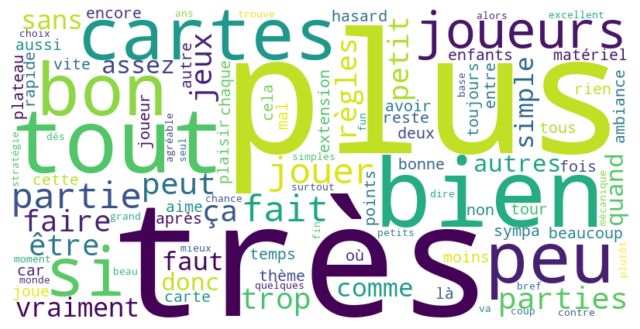

In [ ]:
# Somme des occurrences des mots
word_freq = np.asarray(X_clean.sum(axis=0)).flatten()
vocab = vectorizer.get_feature_names_out()

# Trier par fr√©quence d√©croissante
sorted_indices = np.argsort(word_freq)[::-1]
top_100_words = {vocab[i]: word_freq[i] for i in sorted_indices[:100]}
print(top_100_words)

# Afficher le word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(top_100_words)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

{'plus': 67504, 'bien': 56920, 'tr√®s': 55379, 'tout': 51074, 'peu': 42335, 'bon': 40652, 'si': 39830, 'fait': 37260, 'joueurs': 35762, 'cartes': 35649, 'peut': 35590, 'partie': 35186, 'jouer': 34257, 'parties': 33481, 'faire': 32278, '√™tre': 30662, 'jeux': 28328, '√ßa': 27741, 'r√®gles': 27612, 'sans': 27396, 'comme': 26583, 'trop': 25973, 'faut': 25425, 'donc': 24271, 'vraiment': 23988, 'autres': 23680, 'petit': 23103, 'quand': 21803, 'mat√©riel': 21708, 'aussi': 21594, 'assez': 21477, 'simple': 21394, 'car': 21328, 'moins': 20473, 'beaucoup': 20190, 'deux': 19090, 'cette': 18614, 'fois': 18430, 'avoir': 18219, 'temps': 18045, 'th√®me': 17754, 'entre': 17325, 'bonne': 17296, 'l√†': 16857, 'o√π': 16438, 'tous': 16277, 'encore': 16102, 'cela': 16018, 'joueur': 15597, 'autre': 15572, 'chaque': 15404, 'plateau': 15378, 'apr√®s': 15341, 'toujours': 15035, 'alors': 15033, 'bref': 15027, 'plaisir': 14946, 'non': 14771, 'rien': 14730, 'points': 14700, 'tour': 14575, 'reste': 14424, 'quelque

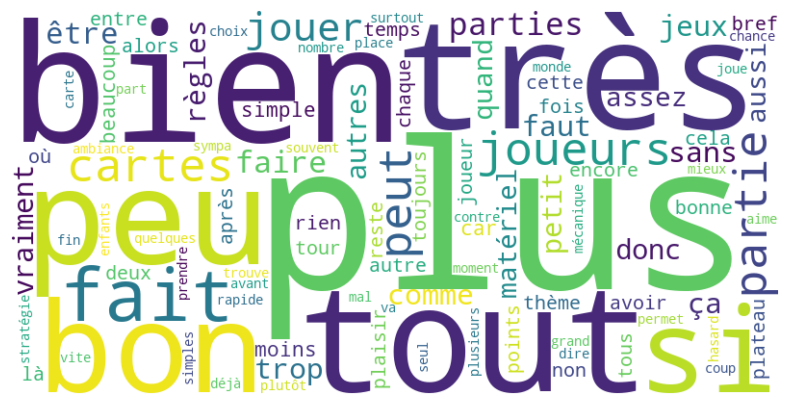

In [ ]:
# Nombre de documents contenant chaque mot
doc_freq = (X_clean > 0).sum(axis=0).A1  # A1 permet de convertir la matrice en un tableau NumPy plat (1D).
sorted_indices = np.argsort(doc_freq)[::-1]
top_100_doc_freq = {vocab[i]: doc_freq[i] for i in sorted_indices[:100]}
print(top_100_doc_freq)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(top_100_doc_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
vectorizer_pos = CountVectorizer(preprocessor=preprocess, stop_words=stop_words )
X_positif = vectorizer_pos.fit_transform(positifs)
dic_size = X_positif.shape[1]
print(dic_size)
print(vectorizer_pos.get_feature_names_out()[:10])

108371
['aaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh'
 'aaaaaaaaaaaaaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhh'
 'aaaaaaaaaaaaaaaaaaaaaadore' 'aaaaaaaaaaaaaaaaaarg'
 'aaaaaaaaaaaaaaarrrgggggggghh' 'aaaaaaaaaaaaarrrrrrrrrrgggghhhh'
 'aaaaaaaaaaaah' 'aaaaaaaaaaah' 'aaaaaaaaaah' 'aaaaaaaaaahhh']


In [39]:
stop_words = set(stopwords.words("french")).union({"jeu"})

vectorizer_neg = CountVectorizer(preprocessor=preprocess, stop_words=list(stop_words) )
X_negatif = vectorizer_neg.fit_transform(negatifs)
dic_size_n = X_negatif.shape[1]
print(dic_size_n)
print(vectorizer_neg.get_feature_names_out()[:10])

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


{'plus': 81065, 'tr√®s': 64925, 'bien': 60651, 'tout': 52044, 'cartes': 40122, 'si': 36110, 'joueurs': 35986, 'peu': 35348, 'bon': 34921, 'partie': 32861, 'fait': 31318, 'peut': 31204, 'parties': 28260, 'jouer': 28159, 'faire': 27679, '√™tre': 24883, '√ßa': 24846, 'jeux': 24571, 'r√®gles': 23155, 'comme': 21794, 'faut': 21781, 'sans': 20467, 'vraiment': 19865, 'aussi': 19147, 'donc': 18958, 'autres': 18868, 'petit': 17832, 'car': 17303, 'deux': 17277, 'trop': 17075, 'simple': 16731, 'quand': 16560, 'cette': 15954, 'assez': 15814, 'beaucoup': 15410, 'mat√©riel': 15318, 'moins': 15211, 'chaque': 15164, 'fois': 14335, 'joueur': 14284, 'temps': 14186, 'points': 14104, 'avoir': 13779, 'entre': 13496, 'tous': 13319, 'bonne': 13195, 'th√®me': 13077, 'o√π': 13073, 'plateau': 12992, 'tour': 12946, 'encore': 12918, 'l√†': 12483, 'cela': 12276, 'plaisir': 12222, 'toujours': 12115, 'carte': 11902, 'autre': 11360, 'apr√®s': 11091, 'alors': 10665, 'choix': 10404, 'bref': 10341, 'joue': 10258, 'exten

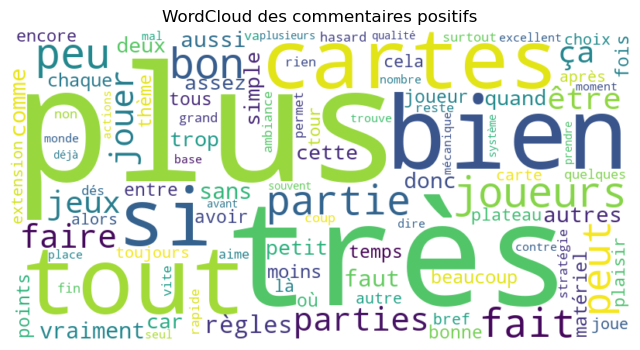

In [ ]:
# word cloud des mots positifs
word_freq_pos = np.asarray(X_positif.sum(axis=0)).flatten()
vocab_pos = vectorizer_pos.get_feature_names_out()

# Trier par fr√©quence d√©croissante
sorted_indices = np.argsort(word_freq_pos)[::-1]
top_100_words_pos = {vocab_pos[i]: word_freq_pos[i] for i in sorted_indices[:100]}
print(top_100_words_pos)

# Afficher le word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(top_100_words_pos)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("WordCloud des commentaires positifs")
plt.axis("off")
plt.show()

{'plus': 46855, 'bien': 30575, 'tr√®s': 27274, 'tout': 26569, 'peu': 25763, 'cartes': 25125, 'si': 22624, 'fait': 19884, 'peut': 19044, 'partie': 18681, '√ßa': 18044, 'joueurs': 17721, 'bon': 17161, 'trop': 17055, '√™tre': 16308, 'faire': 16029, 'jouer': 15311, 'parties': 14774, 'sans': 14006, 'jeux': 13496, 'donc': 13022, 'comme': 12382, 'assez': 11951, 'r√®gles': 11824, 'autres': 11352, 'vraiment': 11296, 'quand': 11070, 'faut': 10453, 'moins': 10368, 'petit': 10064, 'temps': 9854, 'car': 9838, 'beaucoup': 9008, 'mat√©riel': 8797, 'deux': 8773, 'l√†': 8369, 'th√®me': 8367, 'avoir': 8311, 'cela': 7966, 'rien': 7939, 'aussi': 7937, 'fois': 7837, 'cette': 7771, 'o√π': 7664, 'non': 7578, 'alors': 7576, 'joueur': 7563, 'reste': 7477, 'simple': 7449, 'autre': 7356, 'tour': 7243, 'vite': 7230, 'points': 7171, 'mal': 7127, 'carte': 6975, 'hasard': 6886, 'apr√®s': 6766, 'entre': 6762, 'plateau': 6737, 'sympa': 6653, 'quelques': 6537, 'encore': 6488, 'd√©s': 6396, 'bonne': 6387, 'tous': 6002, 

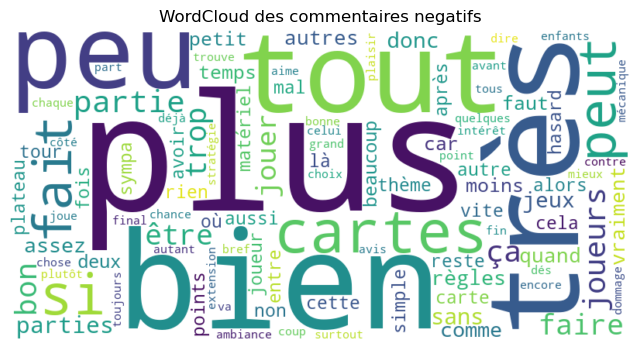

In [ ]:
# word cloud des mots negatifs
word_freq_neg = np.asarray(X_negatif.sum(axis=0)).flatten()
vocab_neg = vectorizer_neg.get_feature_names_out()

# Trier par fr√©quence d√©croissante
sorted_indices = np.argsort(word_freq_neg)[::-1]
top_100_words_neg = {vocab_neg[i]: word_freq_neg[i] for i in sorted_indices[:100]}
print(top_100_words_neg)

# Afficher le word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(top_100_words_neg)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("WordCloud des commentaires negatifs")
plt.axis("off")
plt.show()

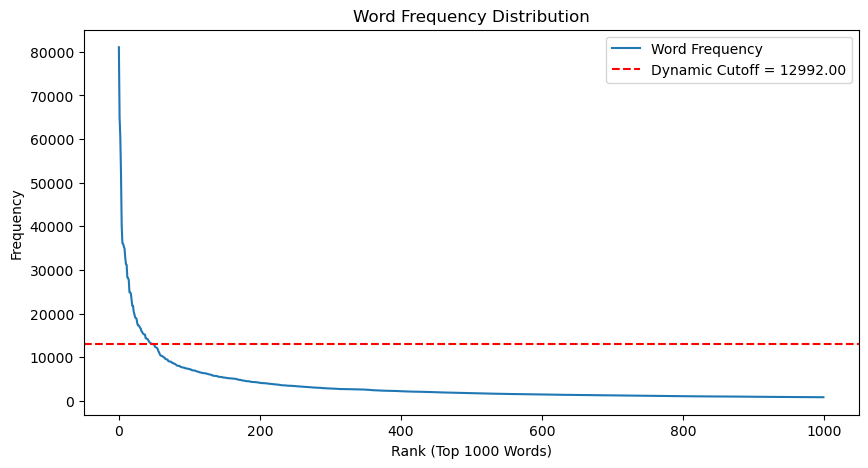

[('plus', 81065), ('tr√®s', 64925), ('bien', 60651), ('tout', 52044), ('cartes', 40122), ('si', 36110), ('joueurs', 35986), ('peu', 35348), ('bon', 34921), ('partie', 32861), ('fait', 31318), ('peut', 31204), ('parties', 28260), ('jouer', 28159), ('faire', 27679), ('√™tre', 24883), ('√ßa', 24846), ('jeux', 24571), ('r√®gles', 23155), ('comme', 21794), ('faut', 21781), ('sans', 20467), ('vraiment', 19865), ('aussi', 19147), ('donc', 18958), ('autres', 18868), ('petit', 17832), ('car', 17303), ('deux', 17277), ('trop', 17075), ('simple', 16731), ('quand', 16560), ('cette', 15954), ('assez', 15814), ('beaucoup', 15410), ('mat√©riel', 15318), ('moins', 15211), ('chaque', 15164), ('fois', 14335), ('joueur', 14284), ('temps', 14186), ('points', 14104), ('avoir', 13779), ('entre', 13496), ('tous', 13319), ('bonne', 13195), ('th√®me', 13077), ('o√π', 13073), ('plateau', 12992), ('tour', 12946), ('encore', 12918), ('l√†', 12483), ('cela', 12276), ('plaisir', 12222), ('toujours', 12115), ('carte

In [ ]:
#!pip install kneed
from kneed import KneeLocator

word_freq_pos = np.asarray(X_positif.sum(axis=0)).flatten()
vocab_pos = vectorizer_pos.get_feature_names_out()

# Construire le Counter √† partir des fr√©quences de X_positif
wcp = Counter(dict(zip(vocab_pos, word_freq_pos)))

freq = [f for w,f in wcp.most_common(1000)]

x = list(range(1, len(freq) + 1))
kneedle = KneeLocator(x, freq, curve='convex', direction='decreasing')
elbow_point = kneedle.knee
cutoff_frequency = freq[elbow_point - 1]

# Plot the word frequencies
plt.figure(figsize=(10, 5))
plt.plot(freq[:1000], label="Word Frequency")
plt.axhline(y=cutoff_frequency, color='r', linestyle='--', label=f"Dynamic Cutoff = {cutoff_frequency:.2f}")

# Add labels and legend
plt.title("Word Frequency Distribution")
plt.xlabel("Rank (Top 1000 Words)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print(wcp.most_common(100))

filtered_positifs_clean = [(word, count) for word, count in wcp.items() if count <= cutoff_frequency]


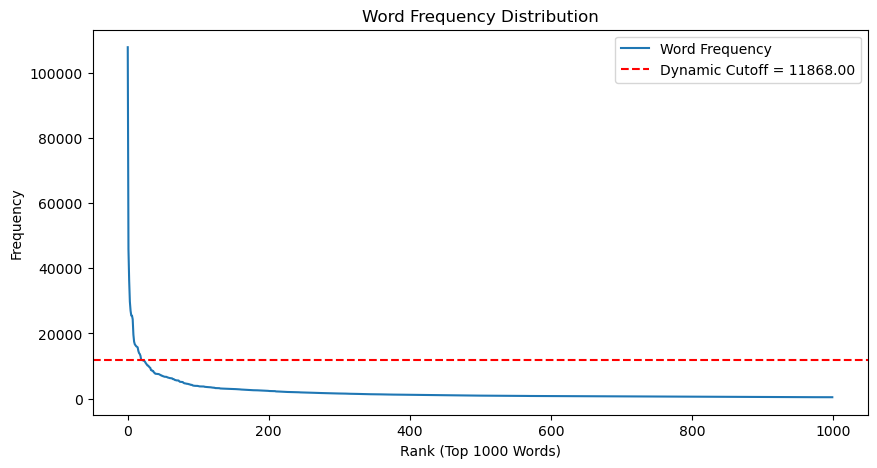

[('jeu', 107805), ('plus', 45873), ("c'est", 36197), ('bien', 29730), ('tr√®s', 26976), ('peu', 25481), ('tout', 25465), ('cartes', 24372), ('fait', 19645), ('partie', 17488), ('trop', 16685), ('joueurs', 16401), ('bon', 16077), ('peut', 15928), ('faire', 15771), ('jouer', 14681), ('parties', 13998), ('sans', 13730), ('jeux', 13172), ('comme', 11978), ("j'ai", 11868), ('assez', 11787), ('donc', 11779), ("n'est", 11603), ('r√®gles', 11521), ('vraiment', 11095), ('quand', 10792), ('√™tre', 10461), ('faut', 10179), ('moins', 10142), ('petit', 9843), ('car', 9617), ('temps', 9442), ('beaucoup', 8761), ("qu'il", 8756), ('mat√©riel', 8509), ('deux', 8506), ('th√®me', 8058), ('', 7946), ('aussi', 7662), ("d'un", 7642), ('fois', 7632), ('autres', 7623), ('cela', 7559), ('cette', 7545), ('rien', 7441), ('joueur', 7312), ('reste', 7165), ('simple', 7145), ('vite', 6949), ('mal', 6923), ('tour', 6828), ('carte', 6740), ('non', 6717), ('alors', 6710), ('points', 6696), ('hasard', 6568), ("qu'on", 

In [ ]:
#!pip install kneed
from kneed import KneeLocator

word_freq_neg = np.asarray(X_negatif.sum(axis=0)).flatten()
vocab_neg = vectorizer_neg.get_feature_names_out()

# Construire le Counter √† partir des fr√©quences de X_positif
wcp = Counter(dict(zip(vocab_neg, word_freq_neg)))

freq = [f for w,f in wcn.most_common(1000)]

x = list(range(1, len(freq) + 1))
kneedle = KneeLocator(x, freq, curve='convex', direction='decreasing')
elbow_point = kneedle.knee
cutoff_frequency = freq[elbow_point - 1]

# Plot the word frequencies
plt.figure(figsize=(10, 5))
plt.plot(freq[:1000], label="Word Frequency")
plt.axhline(y=cutoff_frequency, color='r', linestyle='--', label=f"Dynamic Cutoff = {cutoff_frequency:.2f}")

# Add labels and legend
plt.title("Word Frequency Distribution")
plt.xlabel("Rank (Top 1000 Words)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
print(wcn.most_common(100))
filtered_negatifs_clean = [(word, count) for word, count in wcn.items() if count <= cutoff_frequency]


In [ ]:
print(filtered_positifs_clean[:20])
print("="*140)
print(filtered_negatifs_clean[:20])

[('aaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh', 1), ('aaaaaaaaaaaaaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhh', 1), ('aaaaaaaaaaaaaaaaaaaaaadore', 1), ('aaaaaaaaaaaaaaaaaarg', 1), ('aaaaaaaaaaaaaaarrrgggggggghh', 1), ('aaaaaaaaaaaaarrrrrrrrrrgggghhhh', 1), ('aaaaaaaaaaaah', 1), ('aaaaaaaaaaah', 1), ('aaaaaaaaaah', 1), ('aaaaaaaaaahhh', 1), ('aaaaaaaaaahhhhhh', 1), ('aaaaaaaaahhhhhhhhh', 1), ('aaaaaaaaarrrrrg', 1), ('aaaaaaaaarrrrrrrrrrrrrrrgggggggggggghhhhh', 1), ('aaaaaaah', 1), ('aaaaaaahhh', 1), ('aaaaaaahhhh', 1), ('aaaaaaahhhhhhhhh', 1), ('aaaaaaarh', 1), ('aaaaaah', 5)]
[('comment', 1582), ('continuer', 248), ('apr√®s', 5722), ('mega', 25), ('hit', 87), ('simplement', 1242), ('oiseaux', 30), ('papillons', 45), ('principe', 3570), ('pourrait', 1370), ('√™tre', 10461), ('qualifi√©', 16), ('familial', 1785), ('avancer', 628), ('carte', 6740), ('pays', 297), ('atterrir', 8), ('fleurs', 61), ('collectionner', 225), ('afin', 1128)]


In [ ]:
commonwords=set()
cpt=0
for w in filtered_positifs_clean[:1000]:
    if w in filtered_negatifs_clean[:1000]:
        commonwords.add(w)
        cpt+=1

print(commonwords)
print(cpt)#checking if their is overlapp between the 2

set()
0


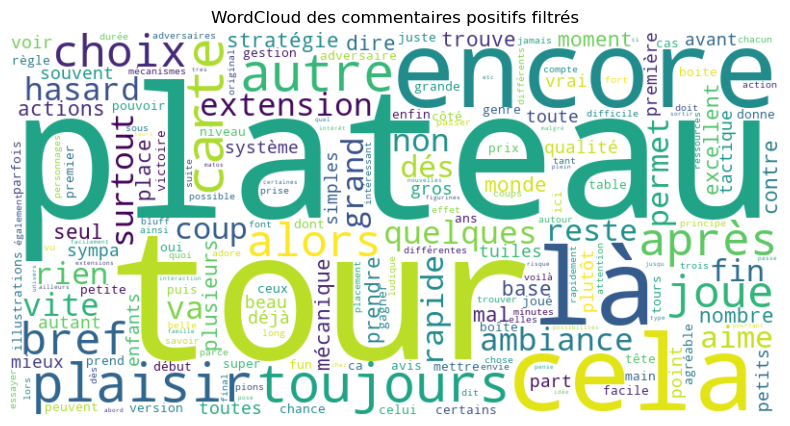

In [ ]:
word_freq_dict = dict(filtered_positifs_clean)

# G√©n√©rer le WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_dict)

# Afficher le WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud des commentaires positifs filtr√©s")
plt.show()

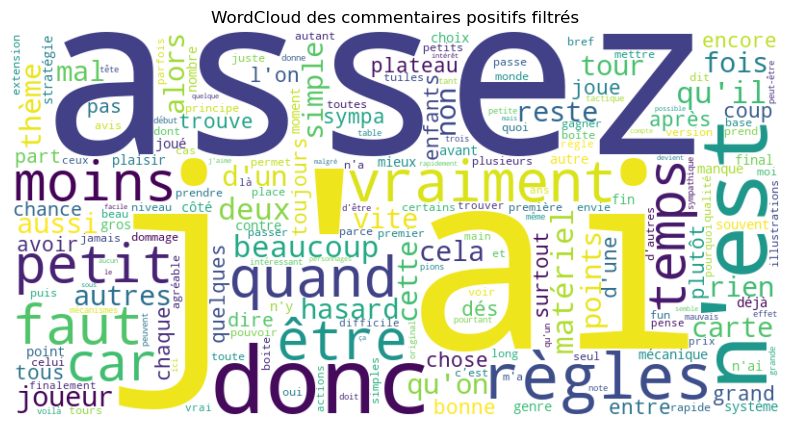

In [ ]:
word_freq_dict = dict(filtered_negatifs_clean)

# G√©n√©rer le WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_dict)

# Afficher le WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud des commentaires positifs filtr√©s")
plt.show()

In [46]:
print(len(comments_of_neighbors))

27


In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [47]:
stop_words = set(stopwords.words("french")).union({"jeu"})

vectorizer = TfidfVectorizer(preprocessor= preprocess, stop_words=list(stop_words))  # On enl√®ve les stopwords anglais, ajustez selon la langue
tfidf_matrix = vectorizer.fit_transform(comments_of_neighbors)

# Afficher la forme de la matrice TF-IDF
print(f"Forme de la matrice TF-IDF : {tfidf_matrix.shape}")

Forme de la matrice TF-IDF : (27, 1437)


In [48]:
import numpy as np

# Somme des poids TF-IDF pour chaque mot (colonne)
word_sums = tfidf_matrix.sum(axis=0)

# R√©cup√©rer les noms des termes
terms = vectorizer.get_feature_names_out()

# Associer chaque mot avec sa somme TF-IDF
word_freq = [(terms[i], word_sums[0, i]) for i in range(len(terms))]

# Trier par fr√©quence d√©croissante
word_freq_sorted = sorted(word_freq, key=lambda x: x[1], reverse=True)

# Afficher les 20 mots les plus fr√©quents avec leurs "fr√©quences" pond√©r√©es TF-IDF
print("Mots les plus fr√©quents (TF-IDF) :")
for word, freq in word_freq_sorted[:20]:
    print(f"{word}: {freq:.2f}")


Mots les plus fr√©quents (TF-IDF) :
plus: 1.09
tout: 1.04
si: 1.03
peut: 0.93
jeux: 0.80
donc: 0.79
jouer: 0.77
tr√®s: 0.75
simple: 0.75
splendor: 0.75
bien: 0.71
faire: 0.68
√ßa: 0.64
peu: 0.64
cartes: 0.63
merci: 0.62
encore: 0.60
o√π: 0.60
comme: 0.59
cette: 0.56


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


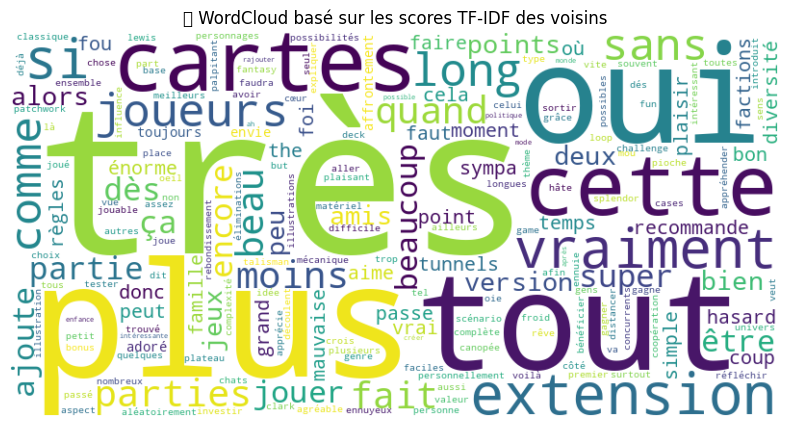

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Associer les mots √† leur poids total TF-IDF
tfidf_scores = tfidf_matrix.sum(axis=0).A1
terms = vectorizer.get_feature_names_out()
tfidf_dict = {terms[i]: tfidf_scores[i] for i in range(len(terms))}

# G√©n√©rer le WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_dict)

# Afficher le WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud bas√© sur les scores TF-IDF des voisins")
plt.show()

In [49]:
pip install gensim

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 26.7/26.7 MB 10.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 38.6/38.6 MB 7.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.0 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.24.0 which is incompatible.
chex 0.1.89 r

In [51]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [71]:
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words("french")).union("jeu")

# Application sur les commentaires
textss = [preprocess(comment) for comment in comments_of_neighbors if isinstance(comment, str)]

texts = [
    [word for word in word_tokenize(comment.lower()) if word not in stop_words and word.isalpha() and len(word) > 2]
    for comment in textss
]



In [72]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


lda_model = gensim.models.LdaModel(
    corpus,
    num_topics=5,  # nombre de topics
    id2word=dictionary,
    passes=10,
    random_state=42
)


In [73]:
for i, topic in lda_model.print_topics(num_words=10):
    print(f"üîπ Topic {i}: {topic}")


üîπ Topic 0: 0.025*"jeu" + 0.015*"plus" + 0.008*"ham" + 0.008*"spider" + 0.008*"marvel" + 0.007*"donc" + 0.007*"peut" + 0.007*"splendor" + 0.006*"jouer" + 0.006*"h√©ros"
üîπ Topic 1: 0.015*"joueuse" + 0.013*"tuiles" + 0.008*"partie" + 0.008*"points" + 0.008*"paysages" + 0.008*"paysage" + 0.008*"ile" + 0.008*"nuage" + 0.008*"√©nergie" + 0.008*"montgolfi√®re"
üîπ Topic 2: 0.009*"jeu" + 0.006*"propose" + 0.006*"vin" + 0.006*"trek" + 0.004*"plus" + 0.004*"th√®me" + 0.004*"sans" + 0.004*"https" + 0.004*"avis" + 0.003*"fait"
üîπ Topic 3: 0.011*"jeu" + 0.009*"cartes" + 0.009*"non" + 0.009*"papillons" + 0.007*"bien" + 0.005*"tout" + 0.005*"comme" + 0.005*"faire" + 0.005*"d√©placement" + 0.005*"po√©tique"
üîπ Topic 4: 0.034*"jeu" + 0.008*"tout" + 0.007*"plus" + 0.006*"tr√®s" + 0.006*"encore" + 0.006*"cette" + 0.005*"comme" + 0.005*"faut" + 0.005*"√™tre" + 0.005*"allez"
